# Supervised learning tutorial: classifying Iris flowers

In this tutorial, we will look at a a very early dataset, from R.A. Fischer's 1936 paper, The Use of Multiple Measurements in Taxonomic Problems. This dataset consists of 


In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



from KAIP3_classification1_helpers import *




## I. Quick data visualization 

Let's do some more pandas magic



In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

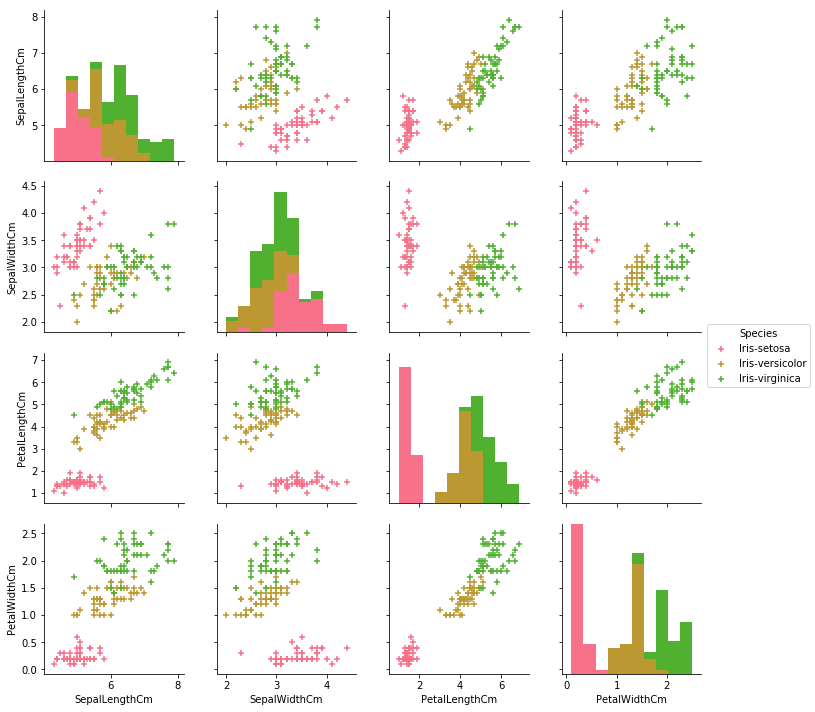

In [7]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [13]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [14]:
### Here we augment the data, just for the purpose of having nicer, more meaningful, training and testing.
### We go from 150 to 300 samples, by perturbing each attributes by +- 10%


X_extend1 = X.copy(deep = True)

for col in X.columns:
    X_extend1[col] = X[col] + X[col] * np.random.randint(-10, 10, size=len(X.index))/100.

X = X.append(X_extend1)

y_temp = y.copy()
y = y.append(y_temp)


In [15]:
X.shape

(300, 4)

## II. Training the model with scikit-learn 

We will now go through a series of famous and widely used classifiers

### 0. Splitting the data

First, we need to separate the data into different sets. These are training, validation, and test sets. 
Remember, the test set is a treasure chest that you need to use only at the very end. 


In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

print(X_test.shape)

(90, 4)


### 1. K-nearest-neighbours 

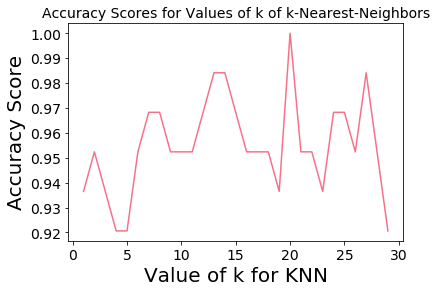

In [26]:
# experimenting with different k values
k_range = list(range(1,30))
scores = []
seeds = []
models = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    rand_seed = np.random.randint(20)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=rand_seed)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    seeds.append(rand_seed)
    models.append(knn)
    
plt.plot(k_range, scores)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Value of k for KNN', fontsize = 20)
plt.ylabel('Accuracy Score', fontsize = 20)
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors', fontsize = 14)
plt.show()

In [28]:
n_neighb = 9

y_pred = models[n_neighb].predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9555555555555556

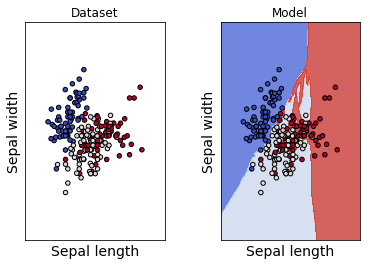

In [29]:
n_neighb = 4

clf_knn = KNeighborsClassifier(n_neighbors=n_neighb)

plot_model_iris(clf_knn, X_train_val, y_train_val)

### 2. Decision Trees

Decision trees are a very popular algorithm because of how intuitive they are. As we will see, we can very easily interpret what they do.

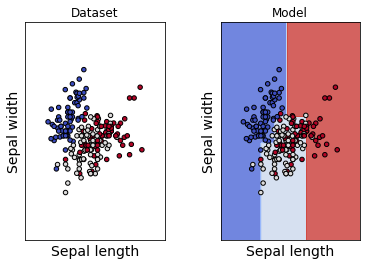

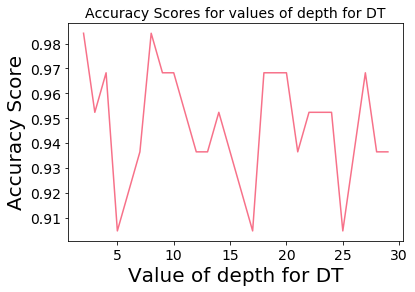

In [55]:
# experimenting with different k values
depth_range = list(range(1,30))
scores = []
seeds = []
models = []
for d in depth_range:
    clf_tree = DecisionTreeClassifier(criterion ='entropy', max_depth = d)
    rand_seed = np.random.randint(20)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=rand_seed)
    clf_tree.fit(X_train, y_train)
    y_pred = clf_tree.predict(X_val)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    seeds.append(rand_seed)
    models.append(clf_tree)
    
plt.plot(depth_range[1:], scores[1:])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Value of depth for DT', fontsize = 20)
plt.ylabel('Accuracy Score', fontsize = 20)
plt.title('Accuracy Scores for values of depth for DT', fontsize = 14)
plt.show()

In [56]:
depth = 9

y_pred = models[depth-1].predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9555555555555556

We can visualize what the tree with the graphviz library. In the image below you can see how a tree with depth two reaches a decision, if it's only trained on the features "sepal width" and "sepal length"

<img src='decision_tree_plot_iris.png'>

We can then plot the decision boundaries. Like we've just seen in the graph above, the boundaries are indeed vertical and horizontal lines than allow us to take binary decisions !

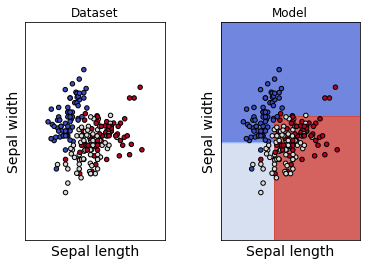

In [40]:
clf_tree = DecisionTreeClassifier(criterion ='entropy', max_depth = 2)

plot_model_iris(clf_tree, X_train_val, y_train_val)

### 3 Logistic Regression

Logistic regression is a popular classifier, for instance because its outputs can be interpreted as probabilities of a certain class. What's more, it can be extended to non-linear classification by using the so-called "Kernel trick".



In [36]:
clf_lr = LogisticRegression(solver='newton-cg', C=1e10, multi_class='multinomial', max_iter = 10000)

clf_lr.fit(X_train_val, y_train_val)

y_pred = clf_lr.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
score





0.9666666666666667

In [ ]:
solvers = ['netwton-cg', 'liblinear', 'sag', 'saga']



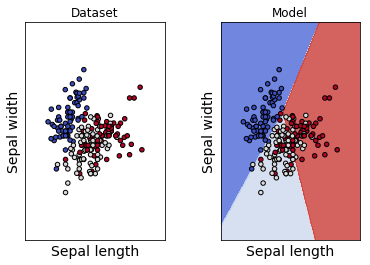

In [37]:
clf_lr = LogisticRegression(solver='newton-cg', C=10, multi_class='multinomial', max_iter = 10000)

plot_model_iris(clf_lr, X_train_val, y_train_val)